<a href="https://colab.research.google.com/github/Manish-Singh-Mehra/Stock_Price_Predictor/blob/main/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as pdr

In [2]:
df = pdr.get_data_tiingo("TCS", api_key='e71b5fcd81a8ba7ee4f00065e6384f604d01b488')

<ipython-input-2-a352139455d9>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo("TCS", api_key='e71b5fcd81a8ba7ee4f00065e6384f604d01b488')


In [3]:
df.to_csv('TCS.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('TCS.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TCS,2018-08-29 00:00:00+00:00,11.20,11.23,11.00,11.13,219640,10.537465,10.565690,10.349296,10.471606,219640,0.0,1.0
1,TCS,2018-08-30 00:00:00+00:00,11.07,11.20,10.78,11.20,239051,10.415155,10.537465,10.142310,10.537465,239051,0.0,1.0
2,TCS,2018-08-31 00:00:00+00:00,11.30,11.47,11.03,11.03,243098,10.631549,10.791493,10.377521,10.377521,243098,0.0,1.0
3,TCS,2018-09-04 00:00:00+00:00,11.38,11.62,11.18,11.25,315309,10.706817,10.932620,10.518648,10.584507,315309,0.0,1.0
4,TCS,2018-09-05 00:00:00+00:00,11.43,11.52,11.21,11.37,183777,10.753859,10.838535,10.546873,10.697408,183777,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,TCS,2023-08-21 00:00:00+00:00,2.47,2.56,2.46,2.56,260388,2.47,2.56,2.46,2.56,260388,0.0,1.0
1252,TCS,2023-08-22 00:00:00+00:00,2.35,2.48,2.30,2.48,463792,2.35,2.48,2.30,2.48,463792,0.0,1.0
1253,TCS,2023-08-23 00:00:00+00:00,2.30,2.36,2.22,2.35,500143,2.30,2.36,2.22,2.35,500143,0.0,1.0
1254,TCS,2023-08-24 00:00:00+00:00,2.27,2.33,2.27,2.27,233362,2.27,2.33,2.27,2.27,233362,0.0,1.0
1255,TCS,2023-08-25 00:00:00+00:00,2.24,2.29,2.21,2.27,260352,2.24,2.29,2.21,2.27,260352,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1.shape

(1256,)

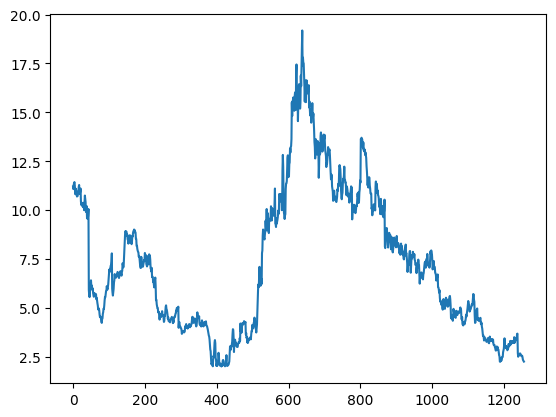

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

  Since,we are using LSTM model and LSTM models are very senstive to scale data. That's why we are using MinMax scaler function.

In [11]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1.shape

(1256, 1)

This part contain train and test data set for our machine learning algorithm

In [33]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data, test_data= df1[0:training_size,:],df1[training_size:len(df1),:1]

In [34]:
training_size,test_size

(816, 440)

Converting above array values in dataset matrix

In [15]:
import numpy
def create_dataset(dataset, time_step=1):
  datax, datay = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    datax.append(a)
    datay.append(dataset[i+ time_step,0])
  return numpy.array(datax), numpy.array(datay)

In [16]:
time_step=100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [17]:
print(x_train.shape),print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [35]:
print(x_test.shape)
print(y_test.shape)

(339, 100, 1)
(339,)


In [19]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [37]:
x_test.shape

(339, 100, 1)

Data preprocessing is completed

Now, Creating a Stacked LSTM model with the help of tensorflow

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=120,batch_size=99, verbose=1)

now We have trained our data this is the time for some data prediction

In [39]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

11/11 [==============================] - 0s 5ms/step


In [40]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [41]:
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_train,train_predict))
rmse

8.719087930642202

In [42]:
mape = math.sqrt(mean_squared_error(y_test,test_predict))
mape

5.222693122799639

In [43]:
accuracy = np.abs((rmse-mape)/rmse)*100
accuracy

40.10046504468543

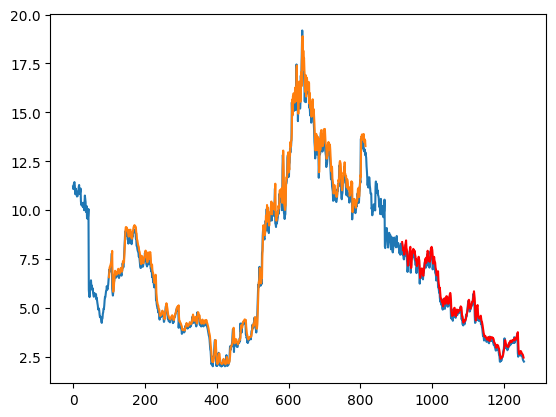

In [44]:
look_back=100
trainPredictPlot= numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot= numpy.empty_like(df1)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]= test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot, color='red')
plt.show()

In [45]:
len(test_data)

440

In [48]:
x_input = test_data[-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [49]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [53]:
np.shape(temp_input)

(100,)

In [58]:
from numpy import array

list_output = []
n_steps = 100
i = 0
while(i<30):
  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print('{} day input {}'.format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))
    y_hat = model.predict(x_input, verbose = 0)
    print('{} day input {}'.format(i,y_hat))
    temp_input.extend(y_hat[0].tolist())
    temp_input = temp_input[1:]
    list_output.extend(y_hat.tolist())
    i = i+1

  else:
    x_input = x_input.reshape((1, n_steps, 1))
    y_hat = model.predict(x_input, verbose = 0)
    print(y_hat[0])
    temp_input.extend(y_hat[0].tolist())
    print(len(temp_input))
    list_output.extend(y_hat.tolist())
    i = i+1
print(list_output)

0 day input [0.03023256 0.01453488 0.01395349 0.0244186  0.02383721 0.01686047
 0.02093023 0.02790698 0.02732558 0.02848837 0.04244186 0.04767442
 0.05232558 0.06569767 0.08372093 0.06511628 0.05988372 0.06104651
 0.05465116 0.06046512 0.05290698 0.05465116 0.04825581 0.05290698
 0.05348837 0.06627907 0.06686047 0.05988372 0.06627907 0.06686047
 0.07616279 0.06511628 0.06627907 0.06860465 0.07209302 0.07616279
 0.07034884 0.07383721 0.07383721 0.07151163 0.07034884 0.0872093
 0.07093023 0.07151163 0.07790698 0.07790698 0.08430233 0.08488372
 0.08546512 0.09709302 0.09767442 0.04011628 0.02906977 0.03604651
 0.03313953 0.03372093 0.03662791 0.03895349 0.03837209 0.03430233
 0.03313953 0.03081395 0.03197674 0.03197674 0.02790698 0.02093023
 0.01802326 0.01627907 0.01453488 0.02089494 0.02232054 0.02512229
 0.02835788 0.03171764 0.0350794  0.03838256 0.04160159 0.04473755
 0.04781043 0.05085112 0.05389409 0.05697183 0.06011093 0.06333015
 0.06663997 0.0700435  0.07353782 0.07711623 0.0807

In [59]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [60]:
len(df1)

1256

In [61]:
df2 = df1.tolist()
df2.extend(list_output)

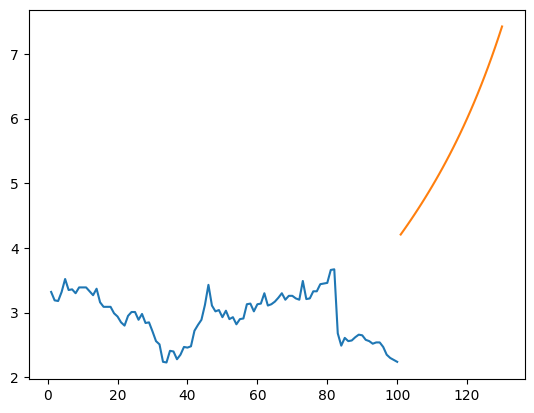

In [63]:
plt.plot(day_new, scaler.inverse_transform(df1[-100:]))
plt.plot(day_pred, scaler.inverse_transform(list_output))

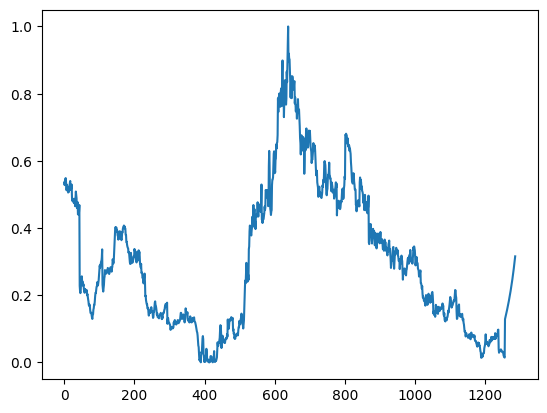

In [66]:
df2 = df1.tolist()
df2.extend(list_output)
plt.plot(df2[:])